<a href="https://colab.research.google.com/github/walpolsh/Experiments/blob/main/Bitcoin_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Dependencies

In [ ]:
!pip install yfinance
!pip install seaborn
import pandas as pd
import yfinance as yf
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Train / Test Split 🤖 and Plot the Bitcorn 🌽


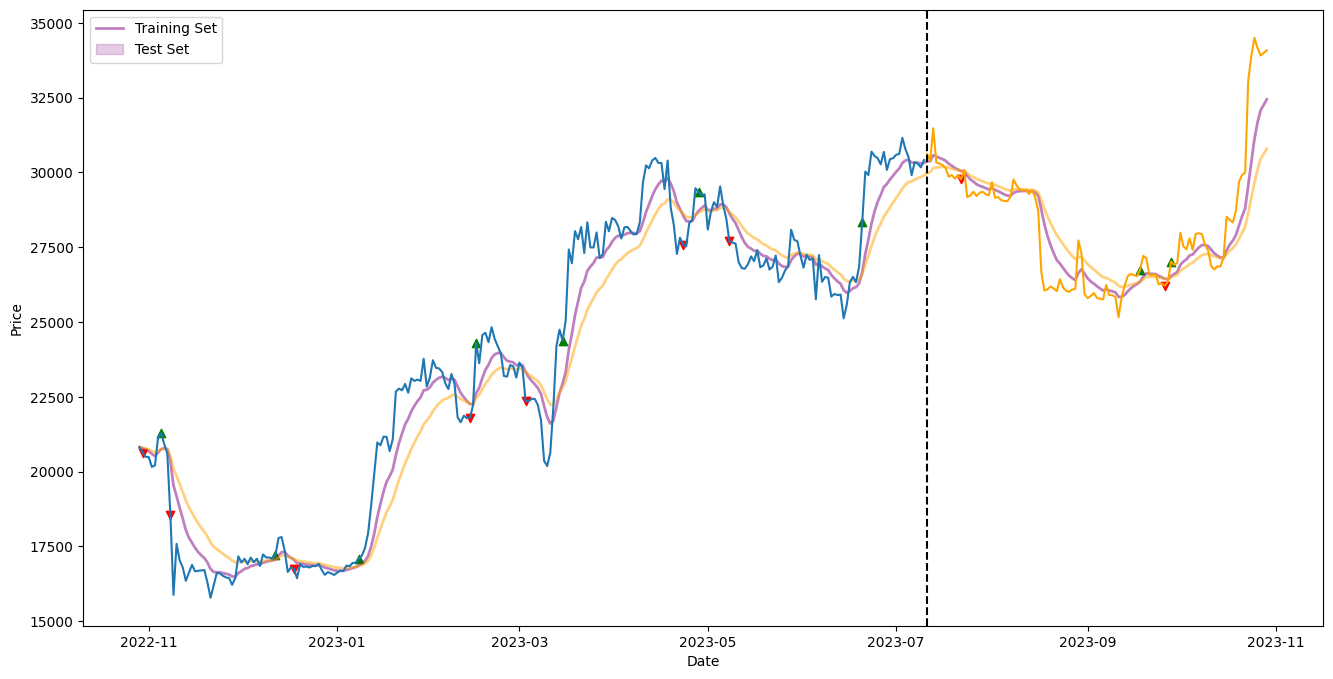

In [6]:
# Get data
btc = yf.Ticker("BTC-USD")
data = btc.history(period="1y")

# Calculate the split index, 70/30
split_idx = int(len(data) * 0.7)

# Get the split date based on the index
split_date = data.iloc[split_idx].name

# Feature Creation: 10 and 20 EMA's
data['10_Day_EMA'] = data['Close'].ewm(span=10, adjust=False).mean()
data['20_Day_EMA'] = data['Close'].ewm(span=20, adjust=False).mean()

# Detect crossover points
data['Buy_Signal'] = (data['10_Day_EMA'] > data['20_Day_EMA']) & (data['10_Day_EMA'].shift(1) <= data['20_Day_EMA'].shift(1))
data['Sell_Signal'] = (data['10_Day_EMA'] < data['20_Day_EMA']) & (data['10_Day_EMA'].shift(1) >= data['20_Day_EMA'].shift(1))

# Split the Data
train = data.loc[data.index < split_date, 'Close']
test = data.loc[data.index >= split_date, 'Close']

plt.figure(figsize=(16, 8))

# Plot the EMA's
data['10 Day EMA'] = sns.lineplot(data=data, x=data.index, y='10_Day_EMA', linewidth=2, label='10 Day EMA', alpha=0.5, color='purple')
data['20 Day EMA'] = sns.lineplot(data=data, x=data.index, y='20_Day_EMA', linewidth=2, label='20 Day EMA', alpha=0.5, color='orange')

# Plotting
sns.lineplot(data=train, label='Training Set')
sns.lineplot(data=test, label='Test Set', color='orange')


# Plot buy and sell signals
buy_signals = data[data['Buy_Signal']]
sell_signals = data[data['Sell_Signal']]
plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='g', alpha=1, label='Buy Signal')
plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='r', alpha=1, label='Sell Signal')


plt.axvline(split_date, color='black', ls='--')
plt.legend(['Training Set', "Test Set"])
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()


# Create Our Model

In [7]:
# last_seven_days = data["Close"].iloc[-7:] # .iloc is integer-location based indexing
# sns.lineplot(data=last_seven_days, label='Training Set')
FEATURES = ['10 Day EMA', '20 Day EMA']
TARGET = "Close"
X_train = train[FEATURES]
Y_train = train[TARGET]
reg = xgb.XGBRegressor(n_estimators = 1000)
reg.fit(X_train, Y_train)


KeyError: ignored

Bluewave for later

In [ ]:

# def blueWaveFN(data, chlLen, avgLen):
#     # esa
#     esa = data['Close'].ewm(span=chlLen, adjust=False).mean()

#     # d
#     d = (data['Close'] - esa).abs().ewm(span=chlLen, adjust=False).mean()

#     # ci
#     ci = (data['Close'] - esa) / (0.015 * d)

#     # bw1 & bw2
#     bw1 = ci.ewm(span=avgLen, adjust=False).mean()
#     bw2 = bw1.ewm(span=3, adjust=False).mean()

#     return bw1, bw2

# data['bw1'], data['bw2'] = blueWaveFN(data, 9, 12)
